In [ ]:
# This code is to visuliaze the clustering of the data points in the pancancer combined with control datasets. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir("c:/Users/simei/OneDrive/Documents/GitHub/ErdosFall2024ProteinTeam")
os.listdir()


['.git',
 '.gitattributes',
 'combined_df.csv',
 'Combined_df2.csv',
 'control_sample.xlsx',
 'Gao_cleaned.csv',
 'Gao_posttreatment.csv',
 'Gao_pretreatment.csv',
 'Gao_SeparatePreAndPost.ipynb',
 'Gonzalez_cleaned.csv',
 'pancancer_cleaned.csv',
 'PCA_4files.ipynb',
 'ProcessingGao_pretreatmentCSV.ipynb',
 'ProcessingPanCancerCSV.ipynb',
 'Processing_4filescombined.ipynb',
 'processing_combine all datasets.ipynb',
 'Project 1pager.docx',
 'Proteinsincommon.xlsx']

In [3]:
df_2 = pd.read_csv('combined_df2.csv')

In [4]:
#count the number of the cancer types, which should be 15 now
df_2.Cancer.nunique()

15

In [5]:
# import the packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
#select the continuous features_protein NPX and remove the missing value
protein = df_2.iloc[:, 4:]
protein.dropna(inplace=True)
# check the missing value is indeed removed 
protein.isna().sum()

Q15389    0
P29965    0
P49763    0
Q02763    0
P01127    0
P09341    0
O00182    0
Q14116    0
P09601    0
Q92583    0
P10147    0
P09237    0
P07585    0
P39900    0
Q9BQ51    0
P01730    0
P13500    0
P09038    0
P10747    0
P22301    0
Q13241    0
O76036    0
P48061    0
Q9UQV4    0
P42701    0
P18627    0
P05113    0
Q01151    0
O95727    0
P12544    0
Q9NP84    0
O75509    0
P15692    0
P01133    0
P05231    0
P50591    0
P35968    0
P20718    0
P48023    0
P09382    0
Q16790    0
P26842    0
P14210    0
P43489    0
O75144    0
O43927    0
P32970    0
Q8WXI7    0
P10144    0
dtype: int64

In [8]:
# scale the continous features
scaler = StandardScaler()
protein_scale = scaler.fit_transform(protein)

In [9]:
# make PCA object
pca = PCA(n_components=2)
pca_result = pca.fit_transform(protein_scale)
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_df.sample(5)

,Principal Component 1,Principal Component 2
581,-3.517418,-0.092784
103,11.287177,1.668355
328,-3.341548,0.787396
1161,-2.730803,-0.022940
992,-3.987385,0.264944


In [10]:
#concatenate the PCA with the catogory feature_Cancer
result_df = pd.concat([pca_df, df_2["Cancer"]], axis=1)
result_df.sample(5)

,Principal Component 1,Principal Component 2,Cancer
42,11.153057,1.942676,Ctrl
1440,11.175118,-1.080669,MYEL
1860,NaN,NaN,HODG
1877,NaN,NaN,HODG
1200,-5.565581,-0.081454,LUNGC


In [11]:
#chekc if the all cancer types are included
result_df.Cancer.nunique()

15

In [12]:
# Create a color map
unique_Cancer = df_2['Cancer'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_Cancer)))  # Choose a colormap
len(unique_Cancer)

15

In [15]:
# Map categories to colors
color_map = {cancer: colors[i] for i, cancer in enumerate(unique_Cancer)}
df_2['Color'] = df_2['Cancer'].map(color_map)


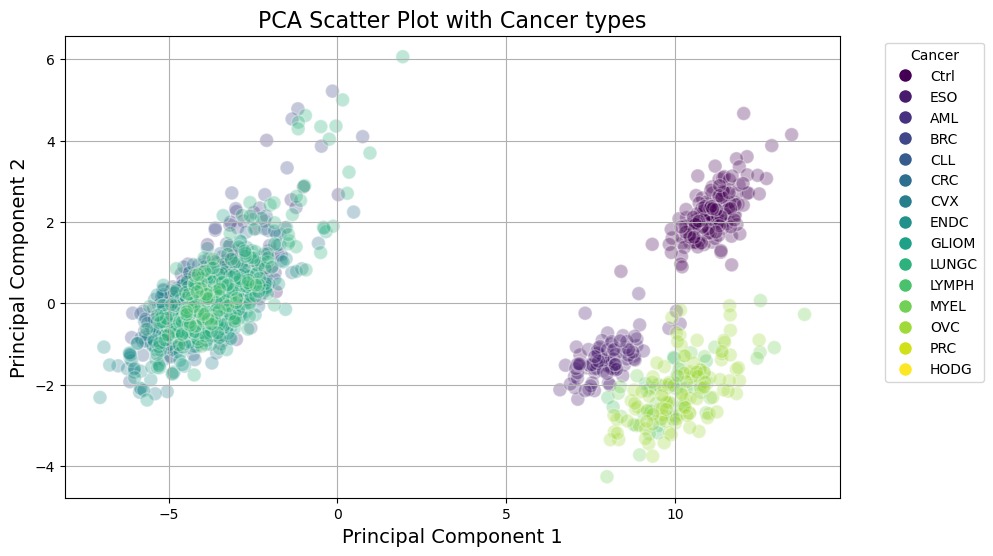

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Principal Component 1'], 
            result_df['Principal Component 2'], 
            color=df_2['Color'], 
            alpha=0.3, 
            edgecolors='w', 
            s=100)
plt.title('PCA Scatter Plot with Cancer types', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

handles = [plt.Line2D([0], [0], marker='o', color='w', label=category, 
                       markerfacecolor=color, markersize=10) 
           for category, color in color_map.items()]
plt.legend(title='Cancer', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()